# The Battle of Neighborhoods

### Import libraries

In [1]:
#Import pandas
import pandas as pd

### Read data from url

In [2]:
#Url with Uruguay postal codes 
url = 'https://www.correo.com.uy/IsisBusquedaDireccionPlugin/localidades.jsp'
#Store Data Frame
df_uy = pd.read_excel(url,header=1)
#Print message
print('Data stored')

Data stored


### Modify dataframe

In [3]:
#Rename columns
headers =['Department', 'Neighborhood', 'PostalCode']
df_uy.columns = headers
#Change first character of each word to uppercase and remaining to lowercase in Borough and Neighborhood cells
df_uy['Department'] = df_uy['Department'].str.title()
df_uy['Neighborhood'] = df_uy['Neighborhood'].str.title()
#Change columns order in data frame
df_uy = df_uy[["PostalCode", "Department", "Neighborhood"]]

### Print dimensions and search for null values

In [4]:
#Print number of rows
print('Number of rows: '+str(df_uy.shape[0]))
#Print number of columns
print('Number of columns: '+str(df_uy.shape[1]))
#Print number of null values
print('Null values in dataframe:')
print(str(df_uy.isnull().sum()))

Number of rows: 2061
Number of columns: 3
Null values in dataframe:
PostalCode      0
Department      0
Neighborhood    0
dtype: int64


### Create a dataframe with Montevideo postal codes and neighborhoods

In [5]:
#Save Montevideo postal codes and neighborhoods in df_mvd
df_mvd = df_uy.loc[df_uy['Department']=='Montevideo',['PostalCode','Neighborhood']]
#Combined rows with equal "PostalCode" values and apply function to each 'Neighborhood' cell  
df_mvd.groupby('PostalCode')['Neighborhood'].apply(lambda x: "%s" % ', '.join(x))
#Restar index values
df_mvd.reset_index(drop=True,inplace=True)
#Print number of rows
print('Number of rows: '+str(df_mvd.shape))

Number of rows: (113, 2)


### Import libraries

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Store coordinates of each location in Montevideo

In [7]:
#Create 'Latitude' and 'Longitude 'columns
df_mvd['Latitude']=None
df_mvd['Longitude']=None

#Iterate over df_mvd with index value of each row as the iterator
for i in df_mvd.index:
    address = str(df_mvd.loc[i,'PostalCode'])+',Montevideo,UY'
    geolocator = Nominatim(user_agent="to_explorer", timeout=3)
    location = geolocator.geocode(address)
#Store coordinates of each location
    df_mvd.loc[i,'Latitude']=location.latitude
    df_mvd.loc[i,'Longitude']=location.longitude
print('Coordinates stored')

Coordinates stored


### Foursquare credentials

In [8]:
CLIENT_ID = 'WJSLZFMYFZZIMASD3SDPXRCC3XVNEXSA3XNA2CLN33TQBP3Z' # your Foursquare ID
CLIENT_SECRET = 'QHTE3T14S1GUL45YHSAKRU4JS2AFODNPWAZGVCQYFVXYE3ZH' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WJSLZFMYFZZIMASD3SDPXRCC3XVNEXSA3XNA2CLN33TQBP3Z
CLIENT_SECRET:QHTE3T14S1GUL45YHSAKRU4JS2AFODNPWAZGVCQYFVXYE3ZH


### Create function to explore neighborhoods

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
mvd_venues = getNearbyVenues(names=df_mvd['Neighborhood'],
                                 latitudes=df_mvd['Latitude'],
                                 longitudes=df_mvd['Longitude'])

Abayuba
Aguada
Aires Puros
Aires Puros
Atahualpa
Atahualpa
Bañados De Carrasco
Barrio Sur
Barrio Sur
Belvedere
Belvedere
Brazo Oriental
Buceo
Buceo
Buceo
Capurro, Bella Vista
Capurro, Bella Vista
Carrasco
Carrasco Norte
Casabo, Pajas Blancas
Casavalle
Castro, P. Castellanos
Centro
Centro
Cerrito
Cerro
Ciudad Vieja
Ciudad Vieja
Ciudad Vieja
Colon Centro Y Noroeste
Colon Centro Y Noroeste
Colon Centro Y Noroeste
Colon Sureste, Abayuba
Conciliacion
Conciliacion
Cordon
Cordon
Flor De Maroñas
Flor De Maroñas
Flor De Maroñas
Ituzaingo
Jacinto Vera
Jardines Del Hipodromo
Jardines Del Hipodromo
La Blanqueada
La Comercial
La Comercial
La Figurita
La Paloma, Tomkinson
La Paloma, Tomkinson
Larrañaga
Las Acacias
Las Canteras
Las Canteras
Las Canteras
La Teja
La Teja
Lezica, Melilla
Lezica, Melilla
Malvin
Malvin Norte
Manga
Manga
Manga, Toledo Chico
Manga, Toledo Chico
Manga, Toledo Chico
Maroñas, Parque Guarani
Melilla
Melilla
Mercado Modelo, Bolivar
Mercado Modelo, Bolivar
Mercado Modelo, Bolivar

### Check the size of the resulting dataframe

In [11]:
#Check the size of the resulting dataframe
print(mvd_venues.shape)
mvd_venues.head()

(930, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abayuba,-34.808998,-56.181281,El Seat De La Iguana,-34.807171,-56.179689,Cable Car
1,Aguada,-34.888445,-56.184663,Mercado Agrícola de Montevideo,-34.887030,-56.183452,Market
2,Aguada,-34.888445,-56.184663,Café del Mercado,-34.887056,-56.183495,Coffee Shop
3,Aguada,-34.888445,-56.184663,Chopería Mastra,-34.886953,-56.183596,Brewery
4,Aguada,-34.888445,-56.184663,El Naranjo,-34.887116,-56.183399,Health Food Store


### Check number of venues by category

In [12]:
mvd_venues['Venue Category'].value_counts()

Pizza Place                      63
Bar                              42
Coffee Shop                      37
Soccer Field                     34
Gym                              31
Supermarket                      29
Theater                          28
Plaza                            26
Gym / Fitness Center             25
Restaurant                       24
BBQ Joint                        24
Dessert Shop                     23
Basketball Court                 19
Brewery                          19
Italian Restaurant               19
Hotel                            18
Convenience Store                18
Ice Cream Shop                   17
Market                           15
Pub                              14
Pharmacy                         13
Sandwich Place                   13
Health Food Store                12
Flea Market                      12
Nightclub                        12
Furniture / Home Store           12
Seafood Restaurant               11
Greek Restaurant            

### Check how many unique categories can be curated from all the returned venues

In [13]:
print('There are {} uniques categories.'.format(len(mvd_venues['Venue Category'].unique())))

There are 86 uniques categories.


### Filter venue categories: 'Supermarket' , 'Shopping Mall' , 'Farmers Market' and 'Convenience Store'

In [14]:
mvd_venues = mvd_venues[mvd_venues['Venue Category'].isin(['Supermarket','Shopping Mall','Farmers Market','Convenience Store'])]
mvd_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
7,Aguada,-34.888445,-56.184663,Iberpark,-34.886914,-56.183579,Convenience Store
13,Aguada,-34.888445,-56.184663,Supermercado Ta-Ta,-34.886913,-56.183258,Supermarket
18,Aguada,-34.888445,-56.184663,Domingo Moizo,-34.886942,-56.183454,Farmers Market
34,Aires Puros,-34.831189,-56.163407,Umpi,-34.829814,-56.168560,Convenience Store
53,Atahualpa,-34.888445,-56.184663,Iberpark,-34.886914,-56.183579,Convenience Store


### Check number of venues by selected category

In [17]:
mvd_venues['Venue Category'].value_counts()

Supermarket          29
Convenience Store    18
Farmers Market       11
Shopping Mall         7
Name: Venue Category, dtype: int64

### Plot number of venues by selected categories

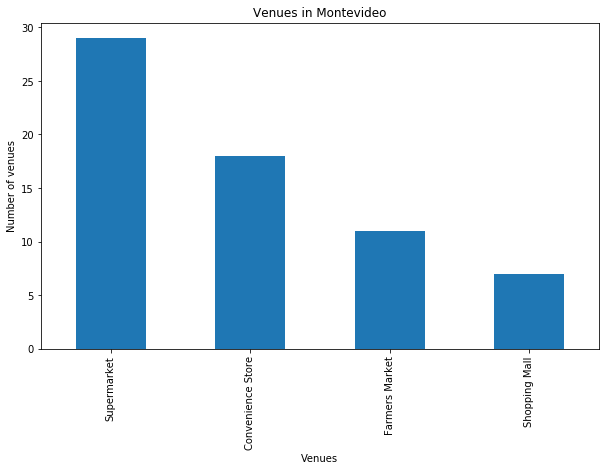

In [41]:
#Import pyplot module
import matplotlib.pyplot as plt

#Store number of venues by category
c_venues = mvd_venues['Venue Category'].value_counts()

# step 2: plot data
c_venues.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Venues in Montevideo') # add title to the plot

plt.show()

### Check how many venues were returned for each neighborhood

In [39]:
mvd_venues['Neighborhood'].value_counts()

Tres Cruces                 5
Ciudad Vieja                4
Cordon                      4
La Comercial                4
Villa Muñoz, Retiro         3
Reducto                     3
Jacinto Vera                3
Aguada                      3
Capurro, Bella Vista        3
Atahualpa                   3
La Figurita                 3
Buceo                       2
Punta Carretas              2
Barrio Sur                  2
Parque Rodo                 2
Centro                      2
Piedras Blancas             1
Manga, Toledo Chico         1
Lezica, Melilla             1
Pocitos                     1
Pque. Batlle, V. Dolores    1
Colon Centro Y Noroeste     1
Larrañaga                   1
Aires Puros                 1
Palermo                     1
Mercado Modelo, Bolivar     1
Las Acacias                 1
Union                       1
Casavalle                   1
La Blanqueada               1
Manga                       1
Cerrito                     1
Melilla                     1
Name: Neig

### Plot number of venues by neighborhoods

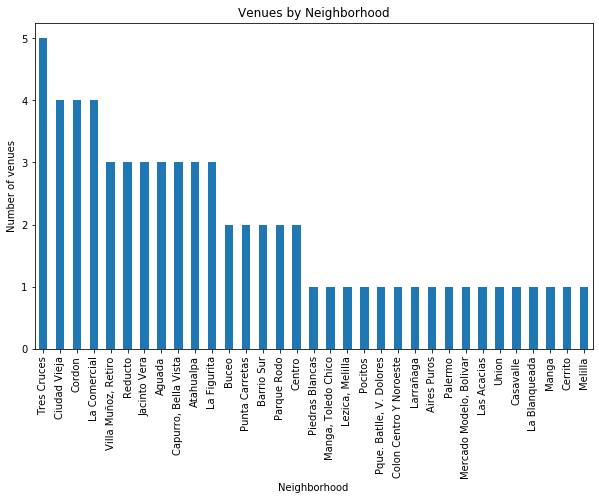

In [44]:
#Import pyplot module
import matplotlib.pyplot as plt

#Store number of venues by category
n_venues = mvd_venues['Neighborhood'].value_counts()

# step 2: plot data
n_venues.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Venues by Neighborhood') # add title to the plot

plt.show()

### Analyze Each Neighborhood

In [84]:
# one hot encoding
mvd_onehot = pd.get_dummies(mvd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mvd_onehot['Neighborhood'] = mvd_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mvd_onehot.columns[-1]] + mvd_onehot.columns[:-1].tolist()
mvd_onehot = mvd_onehot[fixed_columns]

mvd_onehot.head()

,Neighborhood,Convenience Store,Farmers Market,Shopping Mall,Supermarket
7,Aguada,1,0,0,0
13,Aguada,0,0,0,1
18,Aguada,0,1,0,0
34,Aires Puros,1,0,0,0
53,Atahualpa,1,0,0,0


### Plot categories by neighbourhood (Top 5)

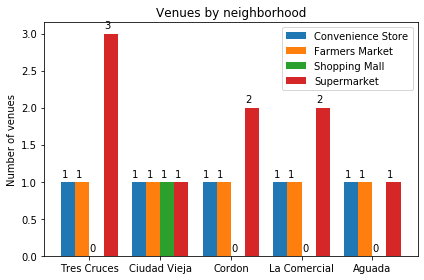

In [122]:
import numpy as np

#5 neighboorhoods with highest quantity of venues
labels = ['Tres Cruces', 'Ciudad Vieja', 'Cordon', 'La Comercial', 'Aguada']

mvd_venues_n = mvd_onehot.groupby(['Neighborhood']).sum()

cs_means = mvd_venues_n.loc[['Tres Cruces', 'Ciudad Vieja', 'Cordon', 'La Comercial', 'Aguada'],'Convenience Store']
fm_means = mvd_venues_n.loc[['Tres Cruces', 'Ciudad Vieja', 'Cordon', 'La Comercial', 'Aguada'],'Farmers Market']
sh_means = mvd_venues_n.loc[['Tres Cruces', 'Ciudad Vieja', 'Cordon', 'La Comercial', 'Aguada'],'Shopping Mall']
sm_means = mvd_venues_n.loc[['Tres Cruces', 'Ciudad Vieja', 'Cordon', 'La Comercial', 'Aguada'],'Supermarket']

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*3/2, cs_means, width, label='Convenience Store')
rects2 = ax.bar(x - width/2, fm_means, width, label='Farmers Market')
rects3 = ax.bar(x + width/2, sh_means, width, label='Shopping Mall')
rects4 = ax.bar(x + width*3/2, sm_means, width, label='Supermarket')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of venues')
ax.set_title('Venues by neighborhood')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 4, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

### Examine the new dataframe size.

In [21]:
mvd_onehot.shape

(65, 5)

In [22]:
mvd_onehot.groupby

<bound method DataFrame.groupby of                  Neighborhood  Convenience Store  Farmers Market  \
7                      Aguada                  1               0   
13                     Aguada                  0               0   
18                     Aguada                  0               1   
34                Aires Puros                  1               0   
53                  Atahualpa                  1               0   
59                  Atahualpa                  0               0   
64                  Atahualpa                  0               1   
81                 Barrio Sur                  0               0   
103                Barrio Sur                  0               0   
150                     Buceo                  0               0   
178                     Buceo                  0               0   
201      Capurro, Bella Vista                  1               0   
207      Capurro, Bella Vista                  0               0   
212      Capu

### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [147]:
mvd_grouped = mvd_onehot.groupby('Neighborhood').mean().reset_index()

In [24]:
#Check new size
mvd_grouped.shape

(33, 5)

### Print each neighborhood along with the top 5 most common venues

In [25]:
num_top_venues = 5

for hood in mvd_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mvd_grouped[mvd_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aguada----
               venue  freq
0  Convenience Store  0.33
1     Farmers Market  0.33
2        Supermarket  0.33
3      Shopping Mall  0.00


----Aires Puros----
               venue  freq
0  Convenience Store   1.0
1     Farmers Market   0.0
2      Shopping Mall   0.0
3        Supermarket   0.0


----Atahualpa----
               venue  freq
0  Convenience Store  0.33
1     Farmers Market  0.33
2        Supermarket  0.33
3      Shopping Mall  0.00


----Barrio Sur----
               venue  freq
0      Shopping Mall   0.5
1        Supermarket   0.5
2  Convenience Store   0.0
3     Farmers Market   0.0


----Buceo----
               venue  freq
0      Shopping Mall   0.5
1        Supermarket   0.5
2  Convenience Store   0.0
3     Farmers Market   0.0


----Capurro, Bella Vista----
               venue  freq
0  Convenience Store  0.33
1     Farmers Market  0.33
2        Supermarket  0.33
3      Shopping Mall  0.00


----Casavalle----
               venue  freq
0  Convenience Sto

### Put into a *pandas* dataframe

In [26]:
#Create a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
#Create the new dataframe and display the top 4 venues for each neighborhood
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mvd_grouped['Neighborhood']

for ind in np.arange(mvd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mvd_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Aguada,Supermarket,Farmers Market,Convenience Store,Shopping Mall
1,Aires Puros,Convenience Store,Supermarket,Shopping Mall,Farmers Market
2,Atahualpa,Supermarket,Farmers Market,Convenience Store,Shopping Mall
3,Barrio Sur,Supermarket,Shopping Mall,Farmers Market,Convenience Store
4,Buceo,Supermarket,Shopping Mall,Farmers Market,Convenience Store


### Cluster Neighborhoods

In [28]:
#Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

mvd_grouped_clustering = mvd_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mvd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 2, 2, 0, 3, 2, 3, 0], dtype=int32)

### Create a new dataframe that includes the cluster as well as the top 4 venues for each neighborhood.

In [29]:
#Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mvd_merged = df_mvd

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mvd_merged = mvd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# Change null values to 0 in 'Cluster Labels' column
mvd_merged['Cluster Labels'].fillna(value=0, inplace=True)

# Change float values to integer values in 'Cluster Labels' column
mvd_merged['Cluster Labels'] = mvd_merged['Cluster Labels'].astype(int)

mvd_merged.head() # check the last columns!

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,12400,Abayuba,-34.809,-56.1813,0,NaN,NaN,NaN,NaN
1,11800,Aguada,-34.8884,-56.1847,0,Supermarket,Farmers Market,Convenience Store,Shopping Mall
2,11700,Aires Puros,-34.8651,-56.2019,3,Convenience Store,Supermarket,Shopping Mall,Farmers Market
3,12300,Aires Puros,-34.8312,-56.1634,3,Convenience Store,Supermarket,Shopping Mall,Farmers Market
4,11700,Atahualpa,-34.8651,-56.2019,0,Supermarket,Farmers Market,Convenience Store,Shopping Mall


### Visualize the resulting clusters

In [30]:
#In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent to_explorer, as shown below.

address = 'Montevideo, Uruguay'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montevideo, Uruguay are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montevideo, Uruguay are -34.9059039, -56.1913569.


### Create Map

In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mvd_merged['Latitude'], mvd_merged['Longitude'], mvd_merged['Neighborhood'], mvd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [32]:
#Cluster 1
mvd_merged.loc[mvd_merged['Cluster Labels'] == 0, mvd_merged.columns[[1] + list(range(5, mvd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Abayuba,NaN,NaN,NaN,NaN
1,Aguada,Supermarket,Farmers Market,Convenience Store,Shopping Mall
4,Atahualpa,Supermarket,Farmers Market,Convenience Store,Shopping Mall
5,Atahualpa,Supermarket,Farmers Market,Convenience Store,Shopping Mall
6,Bañados De Carrasco,NaN,NaN,NaN,NaN
9,Belvedere,NaN,NaN,NaN,NaN
10,Belvedere,NaN,NaN,NaN,NaN
11,Brazo Oriental,NaN,NaN,NaN,NaN
15,"Capurro, Bella Vista",Supermarket,Farmers Market,Convenience Store,Shopping Mall
16,"Capurro, Bella Vista",Supermarket,Farmers Market,Convenience Store,Shopping Mall


In [33]:
#Cluster 2
mvd_merged.loc[mvd_merged['Cluster Labels'] == 1, mvd_merged.columns[[1] + list(range(5, mvd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
29,Colon Centro Y Noroeste,Supermarket,Shopping Mall,Farmers Market,Convenience Store
30,Colon Centro Y Noroeste,Supermarket,Shopping Mall,Farmers Market,Convenience Store
31,Colon Centro Y Noroeste,Supermarket,Shopping Mall,Farmers Market,Convenience Store
44,La Blanqueada,Supermarket,Shopping Mall,Farmers Market,Convenience Store
50,Larrañaga,Supermarket,Shopping Mall,Farmers Market,Convenience Store
57,"Lezica, Melilla",Supermarket,Shopping Mall,Farmers Market,Convenience Store
58,"Lezica, Melilla",Supermarket,Shopping Mall,Farmers Market,Convenience Store
67,Melilla,Supermarket,Shopping Mall,Farmers Market,Convenience Store
68,Melilla,Supermarket,Shopping Mall,Farmers Market,Convenience Store
69,"Mercado Modelo, Bolivar",Supermarket,Shopping Mall,Farmers Market,Convenience Store


In [34]:
#Cluster 3
mvd_merged.loc[mvd_merged['Cluster Labels'] == 2, mvd_merged.columns[[1] + list(range(5, mvd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
7,Barrio Sur,Supermarket,Shopping Mall,Farmers Market,Convenience Store
8,Barrio Sur,Supermarket,Shopping Mall,Farmers Market,Convenience Store
12,Buceo,Supermarket,Shopping Mall,Farmers Market,Convenience Store
13,Buceo,Supermarket,Shopping Mall,Farmers Market,Convenience Store
14,Buceo,Supermarket,Shopping Mall,Farmers Market,Convenience Store
22,Centro,Supermarket,Shopping Mall,Farmers Market,Convenience Store
23,Centro,Supermarket,Shopping Mall,Farmers Market,Convenience Store
77,Parque Rodo,Supermarket,Shopping Mall,Farmers Market,Convenience Store
78,Parque Rodo,Supermarket,Shopping Mall,Farmers Market,Convenience Store
91,Punta Carretas,Supermarket,Shopping Mall,Farmers Market,Convenience Store


In [35]:
#Cluster 4
mvd_merged.loc[mvd_merged['Cluster Labels'] == 3, mvd_merged.columns[[1] + list(range(5, mvd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
2,Aires Puros,Convenience Store,Supermarket,Shopping Mall,Farmers Market
3,Aires Puros,Convenience Store,Supermarket,Shopping Mall,Farmers Market
20,Casavalle,Convenience Store,Supermarket,Shopping Mall,Farmers Market
24,Cerrito,Convenience Store,Supermarket,Shopping Mall,Farmers Market
51,Las Acacias,Convenience Store,Supermarket,Shopping Mall,Farmers Market
61,Manga,Convenience Store,Supermarket,Shopping Mall,Farmers Market
62,Manga,Convenience Store,Supermarket,Shopping Mall,Farmers Market
63,"Manga, Toledo Chico",Convenience Store,Supermarket,Shopping Mall,Farmers Market
64,"Manga, Toledo Chico",Convenience Store,Supermarket,Shopping Mall,Farmers Market
65,"Manga, Toledo Chico",Convenience Store,Supermarket,Shopping Mall,Farmers Market


In [36]:
#Cluster 5
mvd_merged.loc[mvd_merged['Cluster Labels'] == 4, mvd_merged.columns[[1] + list(range(5, mvd_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
86,Pocitos,Shopping Mall,Supermarket,Farmers Market,Convenience Store


###  Mean Distance from Mean coordinates

In [140]:
nh = 'Tres Cruces'

mvd_venues_m = mvd_venues[mvd_venues['Neighborhood']=='Tres Cruces']
venues_mean_coor = [mvd_venues_m['Venue Latitude'].mean(), mvd_venues_m['Venue Longitude'].mean()] 

print(nh)
print("Mean Distance from Mean coordinates")
dists = np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,mvd_venues_m[['Venue Latitude','Venue Longitude']].values)
dists.sort()
print(np.mean(dists[:-1]))# Ignore the biggest distance

Tres Cruces
Mean Distance from Mean coordinates
0.009208206964912846


In [141]:
nh = 'Ciudad Vieja'

mvd_venues_m = mvd_venues[mvd_venues['Neighborhood']=='Ciudad Vieja']
venues_mean_coor = [mvd_venues_m['Venue Latitude'].mean(), mvd_venues_m['Venue Longitude'].mean()] 

print(nh)
print("Mean Distance from Mean coordinates")
dists = np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,mvd_venues_m[['Venue Latitude','Venue Longitude']].values)
dists.sort()
print(np.mean(dists[:-1]))# Ignore the biggest distance

Ciudad Vieja
Mean Distance from Mean coordinates
0.004877912464331421


In [142]:
nh = 'Cordon'

mvd_venues_m = mvd_venues[mvd_venues['Neighborhood']=='Cordon']
venues_mean_coor = [mvd_venues_m['Venue Latitude'].mean(), mvd_venues_m['Venue Longitude'].mean()] 

print(nh)
print("Mean Distance from Mean coordinates")
dists = np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,mvd_venues_m[['Venue Latitude','Venue Longitude']].values)
dists.sort()
print(np.mean(dists[:-1]))# Ignore the biggest distance

Cordon
Mean Distance from Mean coordinates
0.005117133321980784


In [143]:
nh = 'La Comercial'

mvd_venues_m = mvd_venues[mvd_venues['Neighborhood']=='La Comercial']
venues_mean_coor = [mvd_venues_m['Venue Latitude'].mean(), mvd_venues_m['Venue Longitude'].mean()] 

print(nh)
print("Mean Distance from Mean coordinates")
dists = np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,mvd_venues_m[['Venue Latitude','Venue Longitude']].values)
dists.sort()
print(np.mean(dists[:-1]))# Ignore the biggest distance

La Comercial
Mean Distance from Mean coordinates
0.005707009961391229


In [144]:
nh = 'Aguada'

mvd_venues_m = mvd_venues[mvd_venues['Neighborhood']=='Aguada']
venues_mean_coor = [mvd_venues_m['Venue Latitude'].mean(), mvd_venues_m['Venue Longitude'].mean()] 

print(nh)
print("Mean Distance from Mean coordinates")
dists = np.apply_along_axis(lambda x: np.linalg.norm(x - venues_mean_coor),1,mvd_venues_m[['Venue Latitude','Venue Longitude']].values)
dists.sort()
print(np.mean(dists[:-1]))# Ignore the biggest distance

Aguada
Mean Distance from Mean coordinates
8.953480531578716e-05
